In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.QED import qed
from rdkit.Chem.Crippen import MolLogP

IPythonConsole.ipython_useSVG=True 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
moses_canonical = pd.read_csv("../data/generated/moses_canonical_BEP_2.csv")

os.path.splitext("../data/generated/moses_canonical_BEP_2.csv")


('../data/generated/moses_canonical_BEP_2', '.csv')

In [3]:
import sys
from io import StringIO
import os.path


In [4]:
moses_canonical = pd.read_csv("../data/generated/moses_canonical_BEP_2.csv")
guacamol_canonical = pd.read_csv("../data/generated/guacamol_canonical_CL_1.csv")
moses_clearsmi = pd.read_csv("../data/generated/moses_ClearSMILES_BEP.csv")

In [34]:
moses_canonical = pd.read_csv("../data/generated/moses_canonical_character_level.csv")

In [16]:
moses_canonical

,Unnamed: 0,SMILES
0,0,COc1ccc(CN(C)S(=O)(=O)c2ccc3c(c2)CCC3)cc1
1,1,NC(=O)CN1C(=O)c2cccnc2Sc2ccccc21
2,2,Nc1ccc(-c2csc2cccc(Br)c2)nc1
3,3,COCc1cncc2c1CCN(c1ncccc1C#N)C2
4,4,CN(C)C(=O)c1cccc(CSc2ccc(Cl)cc2)c1
...,...,...
9995,9995,O=C(Nc1ccc(Br)cc1)c1cc2c([nH]c1=O)
9996,9996,CC(C)(C)c1csc(SCCCO)n1
9997,9997,CC(C)c1cc(-c2nn3cnnc3Cn2cncn2)n[nH]1
9998,9998,O=C(Nc1ccc(Oc2cccnc2)2CCCCC2)nn1)


In [5]:
def replacing_spaces(chain_str):

    return chain_str.replace(" ", "")

In [9]:
moses_canonical["SMILES"] = moses_canonical["SMILES"].apply(replacing_spaces)

In [10]:
guacamol_canonical["SMILES"] =guacamol_canonical["SMILES"].apply(replacing_spaces)

In [11]:
moses_clearsmi["SMILES"] = moses_clearsmi["SMILES"].apply(replacing_spaces)

In [12]:
print(moses_canonical["SMILES"].to_list())

['COC(=O)C(C)(C)NS(=O)(=O)c1ccc2c(c1)CCC2', 'O=C(Nc1cccc(Cl)c1Oc1cccnc1)c1ccoc1', 'O=C(Nc1ccc(Cl)cc1F)c1cccnc1N1CCOCC1', 'CC(=O)Nc1ccc(OCc2ccc(C(=O)N3CCCC3)cc2)cc1', 'Cc1cc(NC(=O)COc2cc(Cl)ccc2C(N)=O)no1', 'COc1ccccc1N1CCN(CC(=O)NC2CCCCC2C)CC1', 'CCn1c(=O)n(CC(=O)N(CCOC)Cc2ccco2)c2ccccc21', 'COc1ccc(NC(=O)c2ccc3c(c2)CCN3C(C)=O)cc1', 'CCOc1ccc(OCC(=O)Nc2ccc(N)cc2C)cc1', 'CC(C)COC(=O)Cc1csc(NC(=O)c2ccco2)n1', 'CC(NC(=O)C1CCN(C(=O)CO)CC1)c1cccc(Br)c1', 'CCOc1ccc2c(c1)CN(c1ncnc3c1nnn3C)CC2', 'CCOC(=O)c1csc2nc(C(C)C)c(N)n12', 'Cc1cc(C(=O)N(C)C(C)c2cccnc2)c2ccc(F)cc2n1', 'COC(=O)c1ccc(C)c(S(=O)(=O)N(C)C(C)C)c1', 'CC(C)(C)c1n[nH]c(C2CN(Cc3cccs3)CCO2)n1', 'CCOC(=O)c1cnn(-c2ccc3nnc(C)n3n2)c1N', 'COc1ccc(NC(=O)Cn2ccc(C)cc2=O)cc1', 'Cc1noc(C)c1S(=O)(=O)N1CCCN(c2ccc(F)cc2)CC1', 'CC(C)(C)C(NC(=O)c1nccnc1N)c1cccs1', 'Cc1cc(C(N)=O)nc(N2CCN(c3cccc(Cl)c3)CC2)n1', 'COCc1nc(NCCc2ccncc2)c2cnn(C)c2n1', 'O=C(Nc1ccc(Cl)cc1)C1CSc2nccc(=O)n2C1', 'CCOC(=O)c1cnn(-c2ccc(OCC)nn2)c1N', 'CN(C(=O)c1ccc(N2CCN(CCO)CC2)

In [7]:

counter =0
for i in guacamol_canonical["SMILES"].to_list():
    mol = Chem.MolFromSmiles(i)
    if mol:
        counter += 1

counter

[11:42:17] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 31 32
[11:42:17] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 17 28 29
[11:42:17] SMILES Parse Error: extra open parentheses while parsing: COC(C(=O)NC1CCC(CNC(=O)C2NC(C(NC(=O)CC(C)(C)N)C(C)(C)OC2(C)C)C(C)(F)
[11:42:17] SMILES Parse Error: check for mistakes around position 4:
[11:42:17] COC(C(=O)NC1CCC(CNC(=O)C2NC(C(NC(=O)CC(C)
[11:42:17] ~~~^
[11:42:17] SMILES Parse Error: extra open parentheses while parsing: COC(C(=O)NC1CCC(CNC(=O)C2NC(C(NC(=O)CC(C)(C)N)C(C)(C)OC2(C)C)C(C)(F)
[11:42:17] SMILES Parse Error: check for mistakes around position 16:
[11:42:17] COC(C(=O)NC1CCC(CNC(=O)C2NC(C(NC(=O)CC(C)
[11:42:17] ~~~~~~~~~~~~~~~^
[11:42:17] SMILES Parse Error: Failed parsing SMILES 'COC(C(=O)NC1CCC(CNC(=O)C2NC(C(NC(=O)CC(C)(C)N)C(C)(C)OC2(C)C)C(C)(F)' for input: 'COC(C(=O)NC1CCC(CNC(=O)C2NC(C(NC(=O)CC(C)(C)N)C(C)(C)OC2(C)C)C(C)(F)'
[11:42:17] SMILES Parse Error: extra open parentheses while parsing: CC(C(=O)OC(CO)C(OC(=

25854

In [5]:
def get_mol(smiles_or_mol):
    '''
    Loads SMILES/molecule into RDKit's object
    '''
    if isinstance(smiles_or_mol, str):
        if len(smiles_or_mol) == 0:
            return None
        mol = Chem.MolFromSmiles(smiles_or_mol)
        if mol is None:
            return None
        try:
            Chem.SanitizeMol(mol)
        except ValueError:
            return None
        return mol
    return smiles_or_mol

In [6]:

error_dict={
'marked aromatic' : 'aromaticity',
'Unkekulized atoms' : 'aromaticity',
'syntax error' : 'syntax',
'duplicates bond' : 'ring',
'duplicated ring closure' : 'ring',
'unclosed ring': 'ring',
'extra close parentheses': 'parenthesis',
'extra open parentheses' : 'parenthesis',
'Explicit valence' : 'valence'
}

def error_log_classification(samples : str,error_dict : dict[str,str])-> str:
    """
    This function will take a SMILES that has already been checked for validity and will retrieve the error type.
    Args:
    samples (str): a SMILES string to be checked
    error_dict (dict): a dictionary containing the keywords and their corresponding error types
    Returns:
    error_type (str): the type of error found in the SMILES string
    """
    ### declare local variable
    error_type= "unknown"

    ### redirect error log
    sio = sys.stderr = StringIO()

    ### generate mol
    mol= get_mol(samples)

    ### chek if an error happened
    error_log =sio.getvalue()
    
    
    ### iterate through keywords to find error type
    for keyword in error_dict:
        if keyword in error_log:
            error_type= error_dict[keyword]
            
            break

    return error_type,mol

In [7]:

counter =0
for i in guacamol_canonical["SMILES"].to_list():
    mol = get_mol(i)
    if mol:
        counter +=1
    """mol = Chem.MolFromSmiles(i)
    if mol:
        Chem.SanitizeMol(mol) 

        if mol:
            counter +=1
    
"""
counter

[15:41:14] SMILES Parse Error: extra close parentheses while parsing: O=C(CCc1ccc(F)cc1)Nc1ccc(S(=O)(=O)NC(COP(=O)(O)O)C(=O)O)cc1O)cc1
[15:41:14] SMILES Parse Error: check for mistakes around position 61:
[15:41:14] (=O)(O)O)C(=O)O)cc1O)cc1
[15:41:14] ~~~~~~~~~~~~~~~~~~~~^
[15:41:14] SMILES Parse Error: Failed parsing SMILES 'O=C(CCc1ccc(F)cc1)Nc1ccc(S(=O)(=O)NC(COP(=O)(O)O)C(=O)O)cc1O)cc1' for input: 'O=C(CCc1ccc(F)cc1)Nc1ccc(S(=O)(=O)NC(COP(=O)(O)O)C(=O)O)cc1O)cc1'
[15:41:14] SMILES Parse Error: extra close parentheses while parsing: CCCCN(c1ccccc1)S(=O)(=O)c1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1)c1cccc(C)c1
[15:41:14] SMILES Parse Error: check for mistakes around position 60:
[15:41:14] ccc(O)c(C(=O)O)c2)c1)c1cccc(C)c1
[15:41:14] ~~~~~~~~~~~~~~~~~~~~^
[15:41:14] SMILES Parse Error: Failed parsing SMILES 'CCCCN(c1ccccc1)S(=O)(=O)c1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1)c1cccc(C)c1' for input: 'CCCCN(c1ccccc1)S(=O)(=O)c1cccc(C(=O)Nc2ccc(O)c(C(=O)O)c2)c1)c1cccc(C)c1'
[15:41:14] SMILES Parse Err

7868

In [19]:
counter/len(moses_canonical["SMILES"].to_list())

0.5056

In [ ]:
def canonic_smiles(smiles_or_mol):
    mol = get_mol(smiles_or_mol)
    if mol is None:
        return None
    return Chem.MolToSmiles(mol)

In [12]:


L=[]
for i in moses_canonical["SMILES"].to_list():
    canonical_smiles = canonic_smiles(i)
    if canonical_smiles:
        L.append(canonical_smiles)
S = set(L)

print(len(S)/len(L))
    

[11:43:01] Can't kekulize mol.  Unkekulized atoms: 2 11 12 13 15 16 17 18 19 20 21
[11:43:01] SMILES Parse Error: ring closure 1 duplicates bond between atom 11 and atom 25 for input: 'CN(Cc1cnccn1)C(=O)C1(Cc2ccccc2-c2ccccc2)C1(C)C'
[11:43:01] SMILES Parse Error: extra open parentheses while parsing: O=C(Nc1ccsc1C(=O)OCc1nc2ccccc2[nH]c2[nH]ccc12
[11:43:01] SMILES Parse Error: check for mistakes around position 4:
[11:43:01] O=C(Nc1ccsc1C(=O)OCc1nc2ccccc2[nH]c2[nH]c
[11:43:01] ~~~^
[11:43:01] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1ccsc1C(=O)OCc1nc2ccccc2[nH]c2[nH]ccc12' for input: 'O=C(Nc1ccsc1C(=O)OCc1nc2ccccc2[nH]c2[nH]ccc12'
[11:43:01] SMILES Parse Error: unclosed ring for input: 'Cc1nc(NC(=O)N(CCCO)c2cccc(Cl)C(=O)NC2CC2)c1C(C)C'
[11:43:01] Can't kekulize mol.  Unkekulized atoms: 18
[11:43:01] Can't kekulize mol.  Unkekulized atoms: 5 12 13
[11:43:01] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 21 22 23
[11:43:01] Explicit valence for atom # 16 N, 4, is greate

0.9865949020006093


[11:43:03] SMILES Parse Error: unclosed ring for input: 'CC(C)(C)C(=O)N1CCCC(C(=O)NCCCn2cccn2)C1C1'
[11:43:03] SMILES Parse Error: extra close parentheses while parsing: Cc1nc(NCc2cccnc2)c2c3c(sc2n1)CCC3CC(C)C)n1
[11:43:03] SMILES Parse Error: check for mistakes around position 40:
[11:43:03] c3c(sc2n1)CCC3CC(C)C)n1
[11:43:03] ~~~~~~~~~~~~~~~~~~~~^
[11:43:03] SMILES Parse Error: Failed parsing SMILES 'Cc1nc(NCc2cccnc2)c2c3c(sc2n1)CCC3CC(C)C)n1' for input: 'Cc1nc(NCc2cccnc2)c2c3c(sc2n1)CCC3CC(C)C)n1'
[11:43:03] SMILES Parse Error: ring closure 1 duplicates bond between atom 15 and atom 18 for input: 'CN(C(=O)CN1CCCc2sccc2C1)C1(C#N)C1Cc2ccccc2C1'
[11:43:03] SMILES Parse Error: extra open parentheses while parsing: CCn1cc(Cl)c(C(=O)Nc2cccc(CN(C)C(C)=O)c12
[11:43:03] SMILES Parse Error: check for mistakes around position 12:
[11:43:03] CCn1cc(Cl)c(C(=O)Nc2cccc(CN(C)C(C)=O)c12
[11:43:03] ~~~~~~~~~~~^
[11:43:03] SMILES Parse Error: Failed parsing SMILES 'CCn1cc(Cl)c(C(=O)Nc2cccc(CN(C)C(C)=O)

In [13]:
print(len(S)/len(L))

0.9865949020006093


In [14]:

counter =0
for i in moses_clearsmi["SMILES"].to_list():
    mol = Chem.MolFromSmiles(i)
    if mol:
        counter += 1

counter

[11:43:15] SMILES Parse Error: extra open parentheses while parsing: C1C=CC=CC=1C1N(CCN(C1)C(=O)C1C(=O)NC(C)=C(C=1)C(=O)OC
[11:43:15] SMILES Parse Error: check for mistakes around position 15:
[11:43:15] C1C=CC=CC=1C1N(CCN(C1)C(=O)C1C(=O)NC(C)=C
[11:43:15] ~~~~~~~~~~~~~~^
[11:43:15] SMILES Parse Error: Failed parsing SMILES 'C1C=CC=CC=1C1N(CCN(C1)C(=O)C1C(=O)NC(C)=C(C=1)C(=O)OC' for input: 'C1C=CC=CC=1C1N(CCN(C1)C(=O)C1C(=O)NC(C)=C(C=1)C(=O)OC'
[11:43:15] SMILES Parse Error: unclosed ring for input: 'O(C)CC(=O)N1CCCC2C1=CC(=CC=2)NC(=O)C1=CC2CN1N=NN=C1'
[11:43:15] SMILES Parse Error: extra open parentheses while parsing: C1C=CC=CC=1C1N(CCN(C1)S(=O)(=O)C1=CC=C(C=C1)C#N
[11:43:15] SMILES Parse Error: check for mistakes around position 15:
[11:43:15] C1C=CC=CC=1C1N(CCN(C1)S(=O)(=O)C1=CC=C(C=
[11:43:15] ~~~~~~~~~~~~~~^
[11:43:15] SMILES Parse Error: Failed parsing SMILES 'C1C=CC=CC=1C1N(CCN(C1)S(=O)(=O)C1=CC=C(C=C1)C#N' for input: 'C1C=CC=CC=1C1N(CCN(C1)S(=O)(=O)C1=CC=C(C=C1)C#N'
[11:43:15]

29828

In [25]:
#pour chaque token, le mol associé
mol_from_moses_can = []
mol_from_guacamol_can = []
mol_from_moses_clearSmiles = []
#pour chaque token, l'erreur associée
error_vocab_moses_can = []
error_vocab_guacamol_can = []
error_vocab_moses_clearSmiles = []

for i in moses_canonical["SMILES"].to_list():
    error,mol = error_log_classification(i,error_dict=error_dict)
    mol_from_moses_can.append(mol)
    error_vocab_moses_can.append(error)

for i in guacamol_canonical["SMILES"].to_list():
    error,mol = error_log_classification(i,error_dict=error_dict)
    mol_from_guacamol_can.append(mol)
    error_vocab_guacamol_can.append(error)


for i in moses_clearsmi["SMILES"].to_list():
    error,mol = error_log_classification(i,error_dict=error_dict)
    mol_from_moses_clearSmiles.append(mol)
    error_vocab_moses_clearSmiles.append(error)

In [26]:
moses_canonical["mol"] = mol_from_moses_can
moses_canonical["error type if not mol"] = error_vocab_moses_can
error_type_moses_can = moses_canonical["error type if not mol"].unique()

In [27]:
error_count_moses_can = [moses_canonical[moses_canonical["error type if not mol"] == k ]["error type if not mol"].count() for k in error_type_moses_can ]

<BarContainer object of 6 artists>

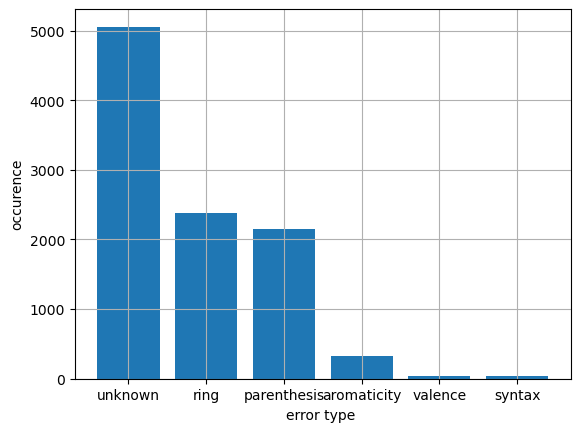

In [28]:
plt.xlabel("error type ")
plt.ylabel("occurence")
plt.grid()
plt.bar(error_type_moses_can,error_count_moses_can)

UNIQUENESS CHECK

In [21]:
from rdkit.Chem.inchi import MolToInchi

In [28]:
moses_inchies_can = set([MolToInchi(mole)  for mole in mol_from_moses_can if mole ])
moses_inchies_clearsmi = set([MolToInchi(mole) for mole in mol_from_moses_clearSmiles if mole ])
guacamol_inchies_can = set([MolToInchi(mole) for mole in mol_from_guacamol_can if mole ])

In [29]:
uniqueness_moses_can = len(moses_inchies_can)/len([mole for mole in mol_from_moses_can if mole])

uniqueness_moses_clearsmi = len(moses_inchies_clearsmi)/len([mole for mole in mol_from_moses_clearSmiles if mole])

uniqueness_guacamol_can = len(guacamol_inchies_can)/len([mole for mole in mol_from_guacamol_can if mole])

In [30]:
uniqueness_moses_can

0.984028484231943

In [31]:
uniqueness_moses_clearsmi

0.9819059107358263

In [32]:
uniqueness_guacamol_can 

0.9947928720203657

QED of Molecule

In [33]:
qed_moses_can = [qed(mole) if mole else 0 for mole in mol_from_moses_can if mole ]

qed_guacamol_can = [qed(mole) if mole else 0 for mole in mol_from_guacamol_can if mole ]

qed_moses_clearsmi = [qed(mole) if mole else 0 for mole in mol_from_moses_clearSmiles if mole ]

In [34]:
n= 500

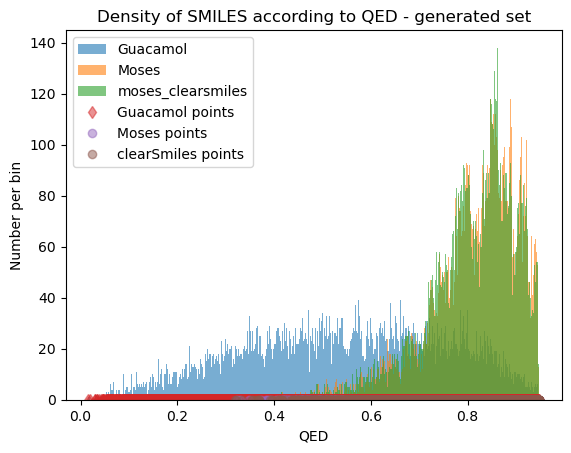

In [36]:
# Compute bins for both datasets
qed_max1 = max(qed_moses_can)
qed_min1 = min(qed_moses_can)
qed_max2 = max(qed_guacamol_can)
qed_min2 = min(qed_guacamol_can)
qed_max3 = max(qed_moses_clearsmi)
qed_min3 = min(qed_moses_clearsmi)

qed_min = min(min(qed_min1, qed_min2),qed_min3)
qed_max = max(max(qed_max1, qed_max2),qed_max3)

bin_width = (qed_max - qed_min) / n
x_bins = [qed_min + k * bin_width for k in range(n+1)]

# Create the plot
fig, ax = plt.subplots()

# Plot histograms
ax.hist(qed_guacamol_can, bins=x_bins, alpha=0.6, label='Guacamol')
ax.hist(qed_moses_can, bins=x_bins, alpha=0.6, label='Moses')
ax.hist(qed_moses_clearsmi, bins=x_bins, alpha=0.6, label='moses_clearsmiles')

# Optionally: overlay scatter points at y=0 for both datasets
ax.plot(qed_guacamol_can, [0]*len(qed_guacamol_can), 'd', label='Guacamol points', alpha=0.5)
ax.plot(qed_moses_can, [0]*len(qed_moses_can), 'o', label='Moses points', alpha=0.5)
ax.plot(qed_moses_clearsmi, [0]*len(qed_moses_clearsmi), 'o', label='clearSmiles points', alpha=0.5)


# Labels and title
ax.set_ylabel('Number per bin')
ax.set_xlabel('QED')
ax.set_title('Density of SMILES according to QED - generated set')
ax.legend()

plt.show()